In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import torch
from torch import nn

import torchvision
import torchvision.transforms as transforms


np.random.seed(0)

In [107]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [108]:
EPOCHS=30
batch_size = 64

# Load MNIST

In [109]:
trans = transforms.Compose([
    # To resize image
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    # To normalize image
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.MNIST(
root = './data',
train = True,
download = True,
transform = trans
)

test_set = torchvision.datasets.MNIST(
root = './data',
train = False,
download = True,
transform = trans
)

len(train_set), len(test_set)

(60000, 10000)

In [110]:
train_set[0][0].shape

torch.Size([1, 32, 32])

# Train & validation data split

In [111]:
def split_indices(n, val_per):
    n_val = int(n * val_per)
    idx = np.random.permutation(n)
    return idx[:n_val], idx[n_val:]

In [112]:
val_per = 0.2
train_indices, val_indices = split_indices(len(train_set), val_per)
print(len(train_indices), len(val_indices))

12000 48000


In [113]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [114]:
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(train_set, batch_size=batch_size, sampler = train_sampler)
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(train_set, batch_size=batch_size, sampler = val_sampler)

# Models

In [115]:
class LeNet_1(nn.Module):
    def __init__(self, num_classes, grayscale=False):
        super(LeNet_1, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
        
        self.conv_1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5, stride=1)        
        #self.relu = nn.ReLU()
        self.tahn = nn.Tanh()
        self.avgpool_1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv_2 = nn.Conv2d(in_channels=6, out_channels=16,  kernel_size=5, stride=1)
        self.avgpool_2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        in_ch_fc1 = 400
        
        self.fc1 = nn.Linear(in_ch_fc1, 120)     
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        self.softmax=nn.Softmax(dim=1)
 

    def forward(self, x):
        y = self.conv_1(x)
        y = self.tahn(y)
        y = self.avgpool_1(y)
        y = self.conv_2(y)
        y = self.tahn(y)
        y = self.avgpool_2(y)
        y = self.tahn(y)
        
        y = torch.flatten(y,1)
        
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.tahn(y)
        y = self.fc3(y)
        
        y = self.softmax(y)
        
        return y

In [116]:
class LeNet_2(nn.Module):
    def __init__(self, num_classes, grayscale=False):
        super(LeNet_2, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
        
        self.conv_1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5, stride=1)        
        self.relu = nn.ReLU()
        
        self.avgpool_1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv_2 = nn.Conv2d(in_channels=6, out_channels=16,  kernel_size=5, stride=1)
        self.avgpool_2 = nn.AvgPool2d(kernel_size=2, stride=2)
        
        in_ch_fc1 = 400
        
        self.fc1 = nn.Linear(in_ch_fc1, 120)     
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        self.softmax=nn.Softmax(dim=1)
 

    def forward(self, x):
        y = self.conv_1(x)
        y = self.relu(y)
        y = self.avgpool_1(y)
        y = self.conv_2(y)
        y = self.relu(y)
        y = self.avgpool_2(y)
        y = self.relu(y)
        
        y = torch.flatten(y,1)
        
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.relu(y)
        y = self.fc3(y)
        
        y = self.softmax(y)
        
        return y

In [117]:
class LeNet_3(nn.Module):
    def __init__(self, num_classes, grayscale=False):
        super(LeNet_3, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
        
        self.conv_1 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=5, stride=1)        
        self.relu = nn.ReLU()
        
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_2 = nn.Conv2d(in_channels=6, out_channels=16,  kernel_size=5, stride=1)
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        in_ch_fc1 = 400
        
        self.fc1 = nn.Linear(in_ch_fc1, 120)     
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        self.softmax=nn.Softmax(dim=1)
 

    def forward(self, x):
        y = self.conv_1(x)
        y = self.relu(y)
        y = self.maxpool_1(y)
        y = self.conv_2(y)
        y = self.relu(y)
        y = self.maxpool_2(y)
        y = self.relu(y)
        
        y = torch.flatten(y,1)
        
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.relu(y)
        y = self.fc3(y)
        
        y = self.softmax(y)
        
        return y

In [118]:
class LeNet_4(nn.Module):
    def __init__(self, num_classes, grayscale=False):
        super(LeNet_4, self).__init__()
        
        self.grayscale = grayscale
        self.num_classes = num_classes

        if self.grayscale:
            in_channels = 1
        else:
            in_channels = 3
        self.conv_0 = nn.Conv2d(in_channels=in_channels, out_channels=6, kernel_size=3, stride=1)   
        self.conv_1 = nn.Conv2d(in_channels=6, out_channels=6, kernel_size=3, stride=1)        
        self.relu = nn.ReLU()
        
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv_2 = nn.Conv2d(in_channels=6, out_channels=6,  kernel_size=3, stride=1)
        self.conv_3 = nn.Conv2d(in_channels=6, out_channels=16,  kernel_size=3, stride=1)
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        in_ch_fc1 = 400
        
        self.fc1 = nn.Linear(in_ch_fc1, 120)     
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        self.softmax=nn.Softmax(dim=1)
 

    def forward(self, x):
        y = self.conv_0(x)
        y = self.conv_1(y)
        y = self.relu(y)
        y = self.maxpool_1(y)
        y = self.conv_2(y)
        y = self.conv_3(y)
        y = self.relu(y)
        y = self.maxpool_2(y)
        y = self.relu(y)
        
        y = torch.flatten(y,1)
        
        y = self.fc1(y)
        y = self.fc2(y)
        y = self.relu(y)
        y = self.fc3(y)
        
        y = self.softmax(y)
        
        return y

In [119]:
def train_model(model, optimizer, loss_fn, device, train_loader, val_loader, train_losses=[],val_losses=[], EPOCHS = 10):
    for epoch in range(EPOCHS):
        curr_loss=0       
        
        model.train(True)
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
           
            optimizer.zero_grad()
            y_pred = model(images)
            
            
            loss = loss_fn(y_pred, labels)
            loss.backward()
            optimizer.step()
            curr_loss+=loss.item()
            
        with torch.no_grad():
            model.eval()
            val_loss=0
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
               
                
                y_pred = model(images)
                #_, y_pred = torch.max(y_pred,dim=1 )
                loss = loss_fn(y_pred, labels)
                
                val_loss+=loss.item()
        val_losses.append(val_loss/len(val_loader))
        train_losses.append(curr_loss/len(train_loader))

In [120]:
loss_fn = nn.CrossEntropyLoss()

In [121]:
model_1 = LeNet_1(num_classes=10, grayscale=True).to(device)

optimizer_1 = torch.optim.Adam(model_1.parameters())

In [122]:
train_losses_1=[]
val_losses_1=[]
train_model(model=model_1,optimizer=optimizer_1, loss_fn=loss_fn, device=device, train_loader=train_dl,val_loader=val_dl, 
            train_losses=train_losses_1,val_losses=val_losses_1, EPOCHS = EPOCHS)

In [123]:
model_2 = LeNet_2(num_classes=10, grayscale=True).to(device)

optimizer_2 = torch.optim.Adam(model_2.parameters())

In [124]:
train_losses_2=[]
val_losses_2=[]
train_model(model=model_2,optimizer=optimizer_2, loss_fn=loss_fn, device=device, train_loader=train_dl,val_loader=val_dl, 
            train_losses=train_losses_2,val_losses=val_losses_2, EPOCHS = EPOCHS)

In [125]:
model_3 = LeNet_3(num_classes=10, grayscale=True).to(device)

optimizer_3 = torch.optim.Adam(model_3.parameters())

In [126]:
train_losses_3=[]
val_losses_3=[]
train_model(model=model_3,optimizer=optimizer_3, loss_fn=loss_fn, device=device, train_loader=train_dl,val_loader=val_dl, 
            train_losses=train_losses_3,val_losses=val_losses_3, EPOCHS = EPOCHS)

In [127]:
model_4 = LeNet_4(num_classes=10, grayscale=True).to(device)

optimizer_4 = torch.optim.Adam(model_4.parameters())

In [128]:
train_losses_4=[]
val_losses_4=[]
train_model(model=model_4,optimizer=optimizer_4, loss_fn=loss_fn, device=device, train_loader=train_dl,val_loader=val_dl, 
            train_losses=train_losses_4,val_losses=val_losses_4, EPOCHS = EPOCHS)

In [129]:
import matplotlib.pyplot as plt

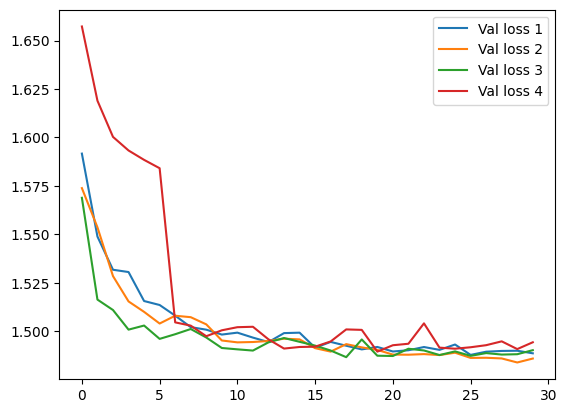

In [130]:
plt.plot(val_losses_1, label = "Val loss 1")
plt.plot(val_losses_2, label = "Val loss 2")
plt.plot(val_losses_3, label = "Val loss 3")
plt.plot(val_losses_4, label = "Val loss 4")

plt.legend()

In [131]:
a = test_set[0][0].reshape(32,32)
a.shape
a.unsqueeze(0).shape

torch.Size([1, 32, 32])

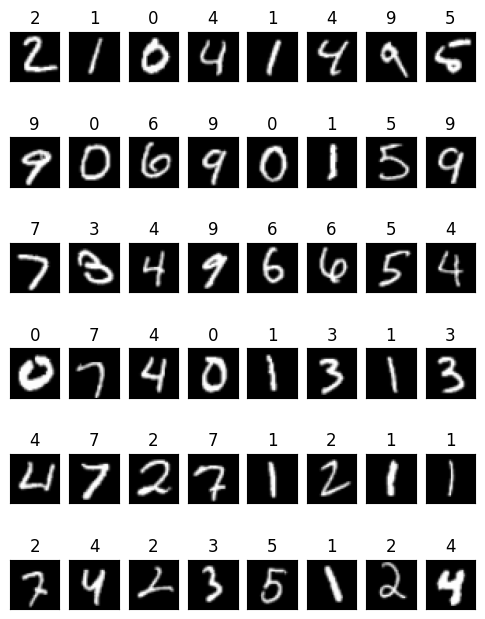

In [134]:
#visulaizing numbers in our dataset.
r = 6
c = 8
fig=plt.figure(figsize=(r, c),dpi=100)
for i in range(1, r*c+1):
    img = test_set[i][0].reshape(32,32)
    ax = fig.add_subplot(r, c, i)
    ax.set_xticks([])
    ax.set_yticks([])
    y_pred = torch.argmax(model_4((img.to(device)).unsqueeze(0).unsqueeze(0))).item()
    ax.title.set_text(y_pred)
    
    plt.imshow(img,cmap='gray')
plt.show()

In [135]:
test_loader = DataLoader(dataset=test_set, 
                         batch_size=batch_size, 
                         shuffle=False)

In [139]:
model=model_4
all_preds=torch.Tensor()
all_labels=torch.Tensor()
with torch.no_grad():
    model.eval()
    for images, labels in test_loader:
        all_labels=torch.cat((all_labels, labels))
        
        images, labels = images.to(device), labels.to(device)
        y_pred = model(images.to(device))
        y_pred=torch.argmax(y_pred.detach().cpu(), dim=1)
        all_preds=torch.cat((all_preds, y_pred))



<Axes: >

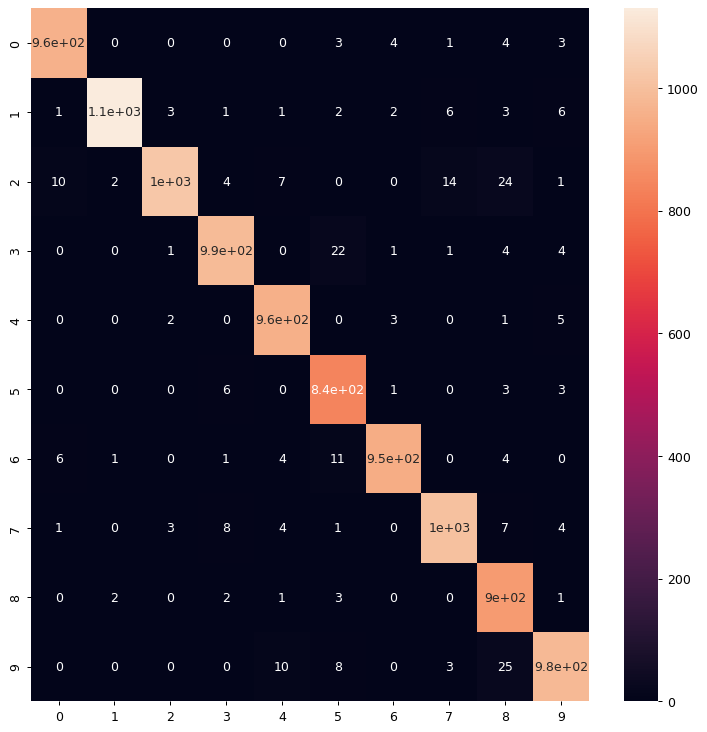

In [140]:
from sklearn.metrics import confusion_matrix
import seaborn
cm = confusion_matrix(all_preds,all_labels)
plt.figure(figsize = (10,10),dpi=90)
seaborn.heatmap(cm,annot=True)